<a href="https://colab.research.google.com/github/xBrymer/TensorFlow-Basics/blob/master/DogsVsCats_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [2]:
import shutil
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import os

In [16]:
print(len(os.listdir(TRAIN_DIR)))

12307


In [16]:
TRAIN_DIR = "/content/gdrive/My Drive/External Datasets/Kaggle/Dogs-Vs-Cats/train"
TRAIN_CATS_DIR = "/content/gdrive/My Drive/External Datasets/Kaggle/Dogs-Vs-Cats/Train/Cats"
TRAIN_DOGS_DIR = "/content/gdrive/My Drive/External Datasets/Kaggle/Dogs-Vs-Cats/Train/Dogs"

TEST_DIR = "/content/gdrive/My Drive/External Datasets/Kaggle/Dogs-Vs-Cats/test1"
MAIN_DIR = "/content/gdrive/My Drive/External Datasets/Kaggle/Dogs-Vs-Cats/Train"

In [4]:
def class_image(image):
  label = image.split('.')[0]
  if label == 'cat': return 0
  elif label == 'dog': return 1

In [5]:
def move_images():
  for image in tqdm(os.listdir(TRAIN_DIR)):
    if class_image(image) == 0:
      shutil.move(f'{TRAIN_DIR}/{image}', f'{TRAIN_CATS_DIR}/{image}' )
    elif class_image(image) == 1:
      shutil.move(f'{TRAIN_DIR}/{image}', f'{TRAIN_DOGS_DIR}/{image}')
  return

In [6]:
cd /content/gdrive/My Drive/External Datasets/Kaggle

/content/gdrive/My Drive/External Datasets/Kaggle


In [7]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/External Datasets/Kaggle"

In [ ]:
!kaggle competitions download -c dogs-vs-cats

In [ ]:
!unzip \*.zip  && rm *.zip

In [15]:
os.mkdir('/content/gdrive/My Drive/External Datasets/Kaggle/Dogs-Vs-Cats/Train/Dogs')

In [17]:
move_images()

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',
  optimizer='adam',metrics=['accuracy'])

In [26]:
Dataset = tf.keras.preprocessing.image_dataset_from_directory(
    MAIN_DIR,
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 25000 files belonging to 2 classes.


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)       

In [28]:
model.fit(Dataset, epochs =3)

Epoch 1/3
782/782 [==============================] - 126s 161ms/step - loss: 0.6430 - accuracy: 0.6844
Epoch 2/3
782/782 [==============================] - 126s 161ms/step - loss: 0.4773 - accuracy: 0.7734
Epoch 3/3
782/782 [==============================] - 127s 162ms/step - loss: 0.4115 - accuracy: 0.8094


In [29]:

model.save('DvC-v1.h5')

In [30]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [31]:
normalized_ds = Dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 0.9802697


In [32]:
model.fit(normalized_ds, epochs =3 )

Epoch 1/3
782/782 [==============================] - 137s 175ms/step - loss: 0.3705 - accuracy: 0.8327
Epoch 2/3
782/782 [==============================] - 134s 171ms/step - loss: 0.3301 - accuracy: 0.8543
Epoch 3/3
782/782 [==============================] - 136s 173ms/step - loss: 0.2859 - accuracy: 0.8782


In [33]:
model.save('DvC-v1.1.h5')

In [40]:
import random


In [43]:

probability_model = tf.keras.Sequential([
  model, tf.keras.layers.Softmax()                   
])

In [56]:

#PREPROCESS TEST IMAGES
def process_test_pictures(limit):
  test_images = []
  
  for image in tqdm(os.listdir(TEST_DIR)[:limit]):
       
    image = tf.keras.preprocessing.image.load_img(
        f'{TEST_DIR}/{image}',
        color_mode="rgb",
        interpolation="bilinear",
        target_size=(128, 128)
    )
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = np.array([image])/255
    image.reshape(128, 128, 3)

    test_images.append(image)


  return test_images

In [57]:
TEST_IMAGES = process_test_pictures(50)

In [61]:

predictions = probability_model.predict(TEST_IMAGES[1])

In [66]:
def predict_images(index):
  predictions = probability_model.predict(TEST_IMAGES[index])
  print(predictions)
  plt.imshow(np.reshape(TEST_IMAGES[index],(128,128,3)))

[[1.]]


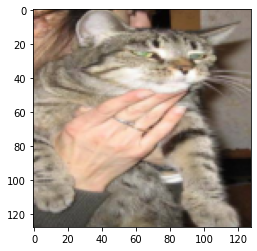

In [78]:
predict_images(38)